## Numerical Analysis Homework 8
---
Student 林之然(B11209005) and 蔡知諺(B11209014), both in department 大氣系 and grade 1.

### Instruction to this Jupyter Notebook:
1. Assign the kernel where you normally run Python.  

2. Click the [全部執行] button or Cell > Run All to execute the entire code. 

3. Look through the codes and discussions.  

4. If the discussion text is not displayed properly (e.g. the line height is too short for read), please find the attached .html file.

#### Import packages

In [69]:
import numpy as np
import matplotlib.pyplot as plt

#### Define governing function and set parameters

In [70]:
bL, bG = 0.00025, 1.1  # Birth rate
dL, dG = 0.7, 0.0005  # Death rate

def ODE_func_L(t,NL,NG):
    dNLdt = bL*NL*NG-dL*NL
    return dNLdt


def ODE_func_G(t,NL,NG):
    dNGdt = bG*NG-dG*NG*NL
    return dNGdt


def Slope(x, y, z, ODE_func):
    Slope = ODE_func(x,y,z)
    return Slope


dt = np.linspace(0,50,501,dtype=float)
NL_initial, NG_initial = 500, 3000

### Q1-1 Euler explicit scheme

#### Define Euler explicit function

In [71]:
def ODE2_Euler(x, y_initial, z_initial, ODE_func1, ODE_func2, h):  # h for time step size (yr)

    y = np.zeros(len(x),dtype=float)
    z = np.zeros(len(x),dtype=float)

    y[0] = y_initial
    z[0] = z_initial

    for i in range(len(x)-1):
        x[i+1] = (x[i] + h)
        y[i+1] = (y[i] + h*Slope(x[i], y[i], z[i], ODE_func1))
        z[i+1] = (z[i] + h*Slope(x[i], y[i], z[i], ODE_func2))

    return x, y, z

#### Calculation

In [72]:
time, lions_eu, gazelles_eu = ODE2_Euler(dt, NL_initial, NG_initial, ODE_func_L, ODE_func_G, 0.1)

#### Plot the result

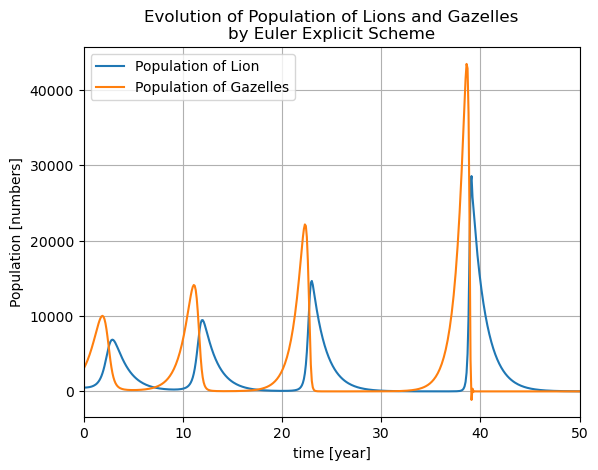

In [73]:
plt.plot(time, lions_eu)
plt.plot(time, gazelles_eu)
plt.title('Evolution of Population of Lions and Gazelles\nby Euler Explicit Scheme')
plt.legend(['Population of Lion', 'Population of Gazelles'])
plt.xlabel('time [year]')
plt.ylabel('Population [numbers]')
plt.xlim(0,50)
plt.grid()
plt.savefig("a.png",dpi=500)

### Q1-2 RK4 scheme

#### Define RK4 functions
Here we define the functions that solves a 2-ODEs system with RK4 scheme, and we extend it to the general form. The functions for specific and the gereral forms are written in the following code, while we only use the latter

This function solves a system of ordinary differential equations using the fourth-order Runge-Kutta scheme (RK4), which involves calculating intermediate values of the dependent variables using weighted averages of the slopes of the ODEs at various points. The function takes as input the ODEs to be solved, the initial conditions for the dependent variables, the current values of the independent variables, and the step size. It returns the final values of the dependent variables as a tuple.

In [74]:
# Define function solving 2-ODEs system
def ODE2_RK4(x, y_initial, z_initial, ODE_func1, ODE_func2, h):

    y = np.zeros(len(x),dtype=float)
    z = np.zeros(len(x),dtype=float)

    y[0] = y_initial
    z[0] = z_initial

    for i in range(len(x)-1):
        x[i+1] = x[i] + h
        sp1 = Slope(x[i], y[i], z[i], ODE_func1)
        sp12 = Slope(x[i], y[i], z[i], ODE_func2)

        sp2 = Slope(x[i] + 0.5*h, y[i] + 0.5*sp1*h, z[i] + 0.5*sp12*h, ODE_func1)
        sp22 = Slope(x[i] + 0.5*h, y[i] + 0.5*sp1*h, z[i] + 0.5*sp12*h, ODE_func2)

        sp3 = Slope(x[i] + 0.5*h, y[i] + 0.5*sp2*h, z[i] + 0.5*sp22*h, ODE_func1)
        sp32 = Slope(x[i] + 0.5*h, y[i] + 0.5*sp2*h, z[i] + 0.5*sp22*h, ODE_func2)

        sp4 = Slope(x[i] + h, y[i] + sp3*h, z[i] + sp32*h, ODE_func1)
        sp42 = Slope(x[i] + h, y[i] + sp3*h, z[i] + sp32*h, ODE_func2)

        y[i+1] = y[i] + h * (sp1 + 2*sp2 + 2*sp3 + sp4) / 6
        z[i+1] = z[i] + h * (sp12 + 2*sp22 + 2*sp32 + sp42) / 6

    return x, y, z


# Define function solving n-ODEs system
def ODEs_Solve_RK4(ODE_funcs, p0, vars, h):
    
    n = len(vars) # number of variables
    p = p0 # initial values of dependent variables

    # initialize arrays with zeros
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    v1 = np.zeros(n)
    v2 = np.zeros(n)
    v3 = np.zeros(n)
    v4 = np.zeros(n)

    for i in range(n):  # calculate k1 and v1 for each dependent variable
        k1[i] = ODE_funcs[i](p, *vars) 
        v1[i] = vars[i] + k1[i] * h / 2 

    p = p0 + h / 2  # update the value of the independent variable
    for i in range(n): 
        k2[i] = ODE_funcs[i](p, *v1) 
        v2[i] = vars[i] + k2[i] * h / 2 

    p = p0 + h / 2
    for i in range(n):
        k3[i] = ODE_funcs[i](p, *v2)
        v3[i] = vars[i] + k3[i] * h

    p = p0 + h
    for i in range(n):
        k4[i] = ODE_funcs[i](p, *v3)
        v4[i] = vars[i] + (k1[i] + 2 * k2[i] + 2 * k3[i] + k4[i]) * h / 6  # calculate the final value of the ith dependent variable using the weighted average of k1, k2, k3, and k4

    return tuple(v4)  # return the final values of the dependent variables as a tuple



#### Calculate

In [75]:
# Set innitial value
T = np.linspace(0,50,501)  # time
L = 500 * np.ones(501)  # number of lions
G = 3000 * np.ones(501)  # number of gazelles

# Calculate value through time (50yrs)
for i in range(501):
    L[i],G[i] = ODEs_Solve_RK4([ODE_func_L, ODE_func_G], T[i-1], [L[i-1], G[i-1]] ,0.1)

#### Plot the result

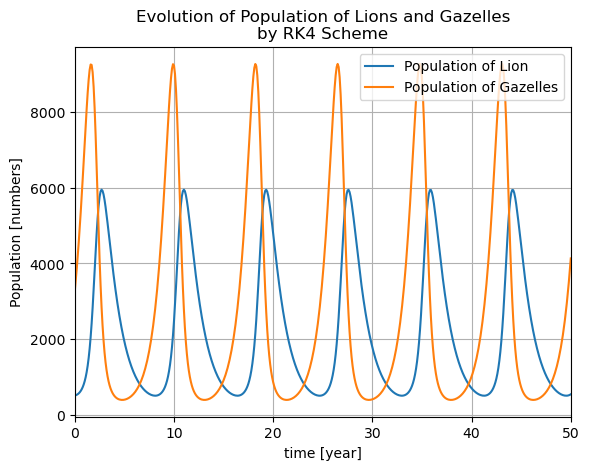

In [81]:
plt.plot(T,L)
plt.plot(T,G)
plt.title('Evolution of Population of Lions and Gazelles\nby RK4 Scheme')
plt.legend(['Population of Lion', 'Population of Gazelles'])
plt.xlabel('time [year]')
plt.ylabel('Population [numbers]')
plt.xlim(0,50)
plt.grid()
plt.savefig("b.png",dpi=500)

### Q1-3 Disscuss observation comparing Euler's scheme and RK4 scheme.
<img src="a.png" width="50%" height="50%">
<figcaption>Fig.(a)</figcaption>

- In Fig. (a):
    - The peaks of both lions and gazelles grows with time, showing the system is unstable.
    - At around 39yrs, there is a negative value causing by negative term in governing equation of gazelles' number changing rate:
    $\displaystyle \small \frac{dN_G}{dt} = b_GN_G-\color{red}d_GN_GN_L$  because the time step (dt) is too large when multiplying the term.

<img src="b.png" width="50%" height="50%">
<figcaption>Fig.(b)</figcaption>

- In figure (b):
    - The peaks of two curve hold, means the system is a balanced system that cycles about 6 times in 50 years.
    - The Phase Diagram (in Q1-4) also shows it.  

###
-  Comparing fig.a and fig.b:
    - It is evident that RK4 scheme have better accuracy under same time step.



#### If reduse time step from 0.1yr to 0.001yr

If reduce Euler's time step for 100 times, the result will close to RK4 scheme.

By observing the Phase Diagram, the each cycle is similar, which means the system is stable enough compared with RK4 method.

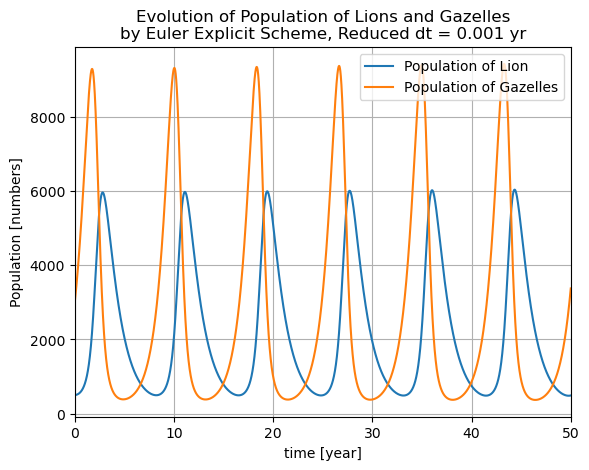

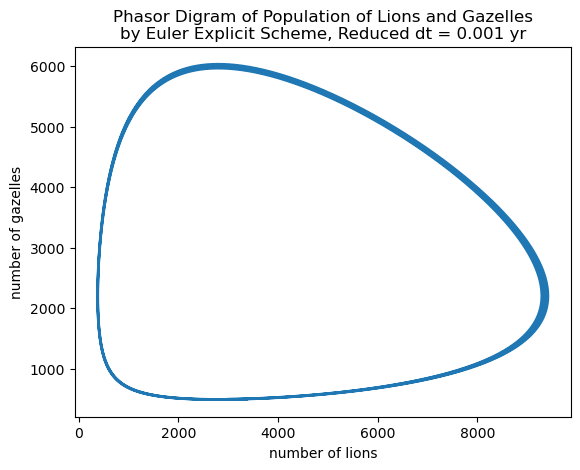

In [88]:
time_step = 0.001
dT = np.linspace(0, 50, int(50//time_step+1), dtype=float)
time, lions_eu2, gazelles_eu2 = ODE2_Euler(dT, NL_initial, NG_initial, ODE_func_L, ODE_func_G, time_step)

plt.plot(time, lions_eu2)
plt.plot(time, gazelles_eu2)
plt.title('Evolution of Population of Lions and Gazelles\nby Euler Explicit Scheme, Reduced dt = 0.001 yr')
plt.legend(['Population of Lion', 'Population of Gazelles'])
plt.xlabel('time [year]')
plt.ylabel('Population [numbers]')
plt.xlim(0,50)
plt.grid()
plt.show()

plt.plot(gazelles_eu2, lions_eu2)
plt.title('Phasor Digram of Population of Lions and Gazelles\nby Euler Explicit Scheme, Reduced dt = 0.001 yr')
plt.xlabel('number of lions')
plt.ylabel('number of gazelles')
plt.show()

### Q1-4 Plot the phase diagram and discuss observation

#### Plot the Phase Diagram of Euler's scheme

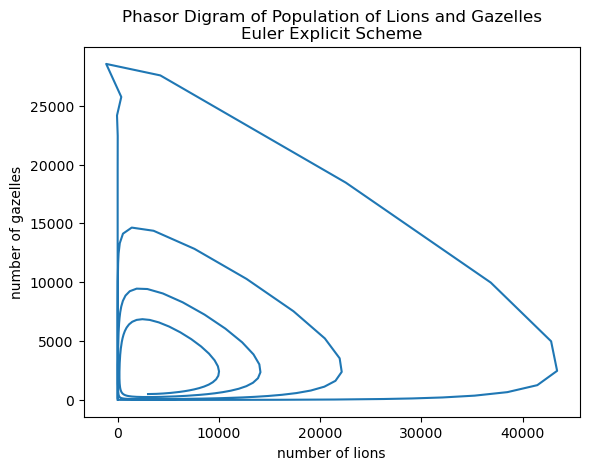

In [91]:
plt.plot(gazelles_eu, lions_eu)
plt.title('Phasor Digram of Population of Lions and Gazelles\nEuler Explicit Scheme')
plt.xlabel('number of lions')
plt.ylabel('number of gazelles')
plt.show()

#### Plot the Phase Diagram of RK4 scheme

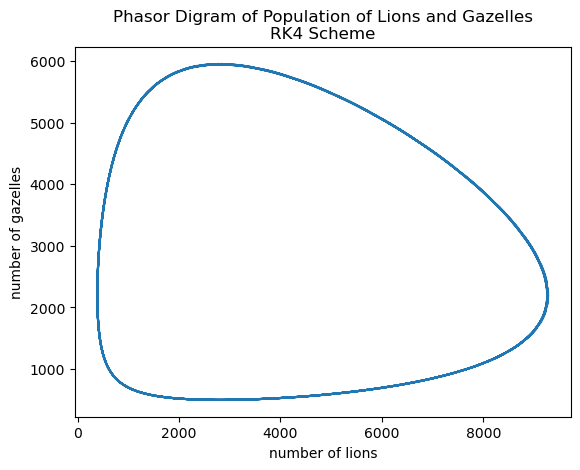

In [92]:
plt.plot(G, L)
plt.title('Phasor Digram of Population of Lions and Gazelles\nRK4 Scheme')
plt.xlabel('number of lions')
plt.ylabel('number of gazelles')
plt.show()

#### Discussion on Phase Diagram

Plotting the phase diagram can reveal insights into the behavior of the system, such as **whether it reaches a steady state or oscillates, and if so, how quickly.** Additionally, comparing the phase diagrams generated by different numerical methods, such as the Euler explicit scheme and RK4 scheme, can provide insights into the accuracy and stability of these methods for solving the system of ODEs.

If the phase diagrams generated by the two methods are similar, it may suggest that the Euler explicit scheme is sufficient for solving the system, as it is simpler and faster than the RK4 scheme. **However, the phase diagrams differ significantly, which indicates that the Euler explicit scheme is not accurate or stable enough for the system, and the RK4 scheme would be a better choice.**

In summary, the purpose of plotting the phase diagram is to **visually analyze the behavior of the system and compare the accuracy and stability** of different numerical methods for solving the system.